In [45]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [47]:
with open('/home/dlandry/ssdataset/validation/2018-05-23-haupt-cross-val/summary.csv') as f:
    df = pd.read_csv(f)

In [48]:
df

,location,reading,reference,loss,kullback_leibler
0,stairs,1,0,0.893637,38.206943
1,stairs,2,0,0.847119,27.155136
2,stairs,2,1,0.941834,39.321490
3,stairs,3,0,0.914622,28.049152
4,stairs,3,1,0.942222,22.133326
5,stairs,3,2,0.986978,29.522832
6,stairs,4,0,0.881473,12.967232
7,stairs,4,1,1.047584,16.419330
8,stairs,4,2,1.271002,18.662267
9,stairs,4,3,1.280265,17.129960


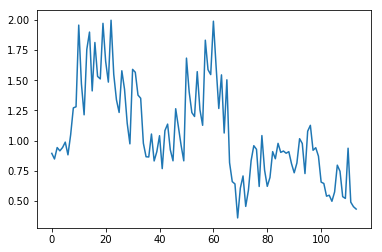

In [49]:
plt.plot(df['loss'])
plt.show()

In [50]:
df['dataset'] == 'gazebo_summer'

KeyError: 'dataset'

<IPython.core.display.Javascript object>


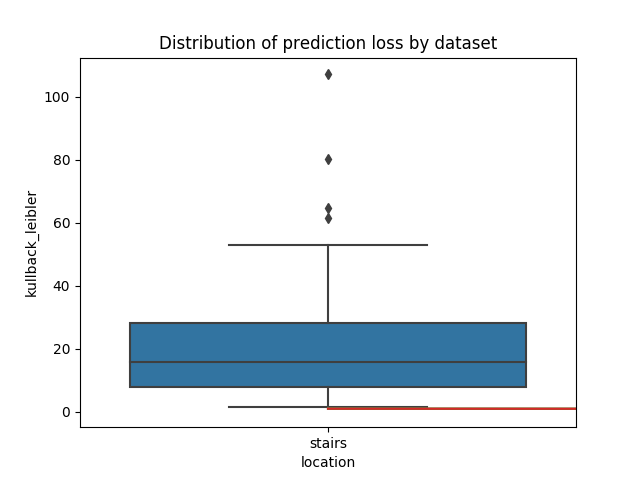

In [33]:
sb.boxplot(x=df['location'], y=df['kullback_leibler'])
plt.title('Distribution of prediction loss by dataset')

In [6]:
df[df['location'] == 'plain']

,location,reading,reference,loss,kullback_leibler


# Similarity matrix between descriptors

In [51]:
import json
import matplotlib.ticker as ticker
import numpy as np
import torch
import seaborn as sb

from recova.learning.learning import model_loader

# Big kickass matrix

In [8]:
dataset_names = [
    'apartment',
    'gazebo-summer',
    'gazebo-winter',
    'plain',
    'stairs',
    'wood-autumn',
    'wood-summer'
]

with open('/home/dlandry/ssdataset/learning_sets/2018-05-23-normals-444-nohaupt.json') as f:
    learning_dataset = json.load(f)
    xs = np.array(learning_dataset['data']['xs'])
    ys = np.array(learning_dataset['data']['ys'])

learning_runs = {}
for d in dataset_names:
    learning_run_file = '/home/dlandry/ssdataset/learning_runs/2018-05-23-normals-444-nohaupt-val-{}.json'.format(d)
    
    
    with open(learning_run_file) as f:
        learning_run = json.load(f)
        learning_runs[d] = learning_run

FileNotFoundError: [Errno 2] No such file or directory: '/home/dlandry/ssdataset/learning_sets/2018-05-23-normals-444-nohaupt.json'

In [9]:
example_learning_run = learning_runs[dataset_names[0]]
n = len(example_learning_run['train_set']) + len(example_learning_run['validation_set'])
similarity_matrix = np.zeros((n, n))
no_data_mask = np.zeros((n,n), dtype=np.bool)

col = 0
for d in dataset_names:
    learning_run = learning_runs[d]
    model = model_loader(learning_run)
    
    no_data_mask[learning_run['validation_set'], col:len(learning_run['validation_set'])]
    
    for pair in learning_run['validation_set']:
        distances = model.compute_distances(xs[pair])
        weights = model.distances_to_weights(torch.Tensor(distances))
        
        similarity_matrix[learning_run['train_set'],col] = weights
        no_data_mask[learning_run['validation_set'],col] = True
        col += 1
    

NameError: name 'learning_runs' is not defined

In [10]:
labels = []
major_ticks = []

last_pos = 0
for d in dataset_names:
    labels.append(d)
    major_ticks.append(last_pos - 1)
    
    last_pos += len(learning_runs[d]['validation_set'])
major_ticks.append(last_pos-1)


minor_ticks = []
for i in range(len(major_ticks) - 1):
    minor_ticks.append((major_ticks[i] + major_ticks[i+1]) / 2.)
    
print(minor_ticks)
print(major_ticks)
print(labels)

NameError: name 'learning_runs' is not defined

In [11]:
fig, ax = plt.subplots()
sb.heatmap(similarity_matrix, mask=no_data_mask, ax=ax, square=True, cmap='YlGnBu')

ax.set_xticks(major_ticks)
ax.set_xticklabels('')
ax.set_xticks(minor_ticks, minor=True)
ax.set_xticklabels(labels, horizontalalignment='center', minor=True, rotation=90)

ax.set_yticks(major_ticks)
ax.set_yticklabels('')
ax.set_yticks(minor_ticks, minor=True)
ax.set_yticklabels(labels, verticalalignment='center', minor=True)

ax.set_xlabel('Estimation pairs')
ax.set_ylabel('Learning example pairs')
ax.set_title('Weight of learning examples during cross validation')

ax.grid(color='black')
ax.tick_params(axis='both', which='minor', length=0)
plt.tight_layout()

<IPython.core.display.Javascript object>

NameError: name 'similarity_matrix' is not defined

# For husky queries

In [109]:
import json
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sb

from recova.learning.learning import model_loader, model_from_file

In [152]:
with open('/home/dlandry/dataset/learning_sets/2018-06-18-density-threshold.json') as f:
    learning_dataset = json.load(f)
    xs = np.array(learning_dataset['data']['xs'])
    ys = np.array(learning_dataset['data']['ys'])

with open('/home/dlandry/dataset/learning_runs/2018-06-18-new-examples.json') as f:
    learning_run = json.load(f)
    
    
with open('/home/dlandry/dataset/query_sets/2018-06-14-incl-couloir.json') as f:
    query_dataset = json.load(f)
    xs_query = np.array(query_dataset['data']['xs'])
    

model = model_from_file('/home/dlandry/dataset/learning_runs/2018-06-18-new-examples.model', 'cello')

In [148]:
len(model.model_predictors)

906

In [154]:
learning_run['validation_set']

similarity_matrix = np.zeros((len(learning_run['train_set']), len(xs_query)))
optimization_set = learning_run['train_set']

sort_of_examples = np.argsort(learning_run['train_set'])
train_set = np.array(learning_run['train_set'])

print(sort_of_examples)
print(len(sort_of_examples))
print(len(train_set))

for q in range(len(xs_query)):
    distances = model.compute_distances(xs_query[q])
    weights = model.distances_to_weights(torch.Tensor(distances))
   
    similarity_matrix[:, q] = weights[sort_of_examples]
    #similarity_matrix[:, q] = weights



[436 570 646 667 635 256 234  18 172 121 448 334 306 637 240 196 186 175
 538 311  33 213 273 138 592 661 163 625 335 574 401 431 608  90 473 191
 399  51 326 410 511 168 216 294 174 563 531  92 355  26 530 703 476 709
 390 194  73 440 236 237 232 569  76 439 276 199 363 303  57 672 656 542
 433 455 707 594 105 498  22 657 266 405 524 333 164 702 629 233 192 691
 293 144 180 227  11  28 636 642  89 589 252 248 416 381 610 460   1 713
 158 249 704  93 493  82  23 605 102 654 184 403 527 398 148 580 590 413
  91  24 251 206 327 584 437 374 555 487 696 296 596  45 255 278 521  95
 628 488 171 154 582 554 285 349 462 122 469 540 250 128 246  59 292 537
 612 427 103 679 670 553 322 386 465 434 366 152 618 456 711 411 376 491
 655 422 494 364 383 686 694 346 541 332 447 593 314 244 321 486 338 504
 676  78 220 409 106  25 108 424 394 407 522 560 666  86 688 406 117 151
 598 518 545  94 323 205 118  85 224 551 449   4 615 157 397 111  19 116
 683 556  38 659 539 391  97 313 566 561 470 341 35

In [155]:

dataset_names = [
    'apartment',
    'gazebo-summer',
    'gazebo-winter',
    'plain',
    'stairs',
    'wood-autumn',
    'wood-summer'
]

dataset_counts = {}
for index in sorted(learning_run['train_set']):
    pair = learning_dataset['data']['pairs'][index]
    
    if  pair['dataset'] not in dataset_counts:
        dataset_counts[pair['dataset']] = 1
    else:
        dataset_counts[pair['dataset']] += 1

labels = []
major_ticks = []
last_pos = 0
for d in sorted(dataset_counts):
    labels.append(d)
    major_ticks.append(last_pos - 1)
    
    last_pos += dataset_counts[d]
major_ticks.append(last_pos-1)


minor_ticks = []
for i in range(len(major_ticks) - 1):
    minor_ticks.append((major_ticks[i] + major_ticks[i+1]) / 2.)
    
print(minor_ticks)
print(major_ticks)
print(labels)

dataset_counts = {}
for index in range(len(query_dataset['data']['pairs'])):
    pair = query_dataset['data']['pairs'][index]
    
    if  pair['dataset'] not in dataset_counts:
        dataset_counts[pair['dataset']] = 1
    else:
        dataset_counts[pair['dataset']] += 1
        
print(dataset_counts)

query_minor_ticks = []
query_major_ticks = []
query_labels = [x for x in sorted(dataset_counts)]
last_pos=0
for d in sorted(dataset_counts):
    query_major_ticks.append(last_pos-1)
    last_pos += dataset_counts[d]
query_major_ticks.append(last_pos-1)
    
for i in range(len(query_major_ticks) - 1):
    query_minor_ticks.append((query_major_ticks[i] + query_major_ticks[i+1]) / 2.)


print(query_major_ticks)
print(query_minor_ticks)
print(query_labels)

[61.5, 169.0, 255.0, 340.0, 420.5, 497.5, 578.5, 666.0]
[-1, 124, 214, 296, 384, 457, 538, 619, 713]
['apartment', 'gazebo_summer', 'gazebo_winter', 'hauptgebaude', 'plain', 'stairs', 'wood_autumn', 'wood_summer']
{'ga': 1911, 'couloir': 1011}
[-1, 1010, 2921]
[504.5, 1965.5]
['couloir', 'ga']


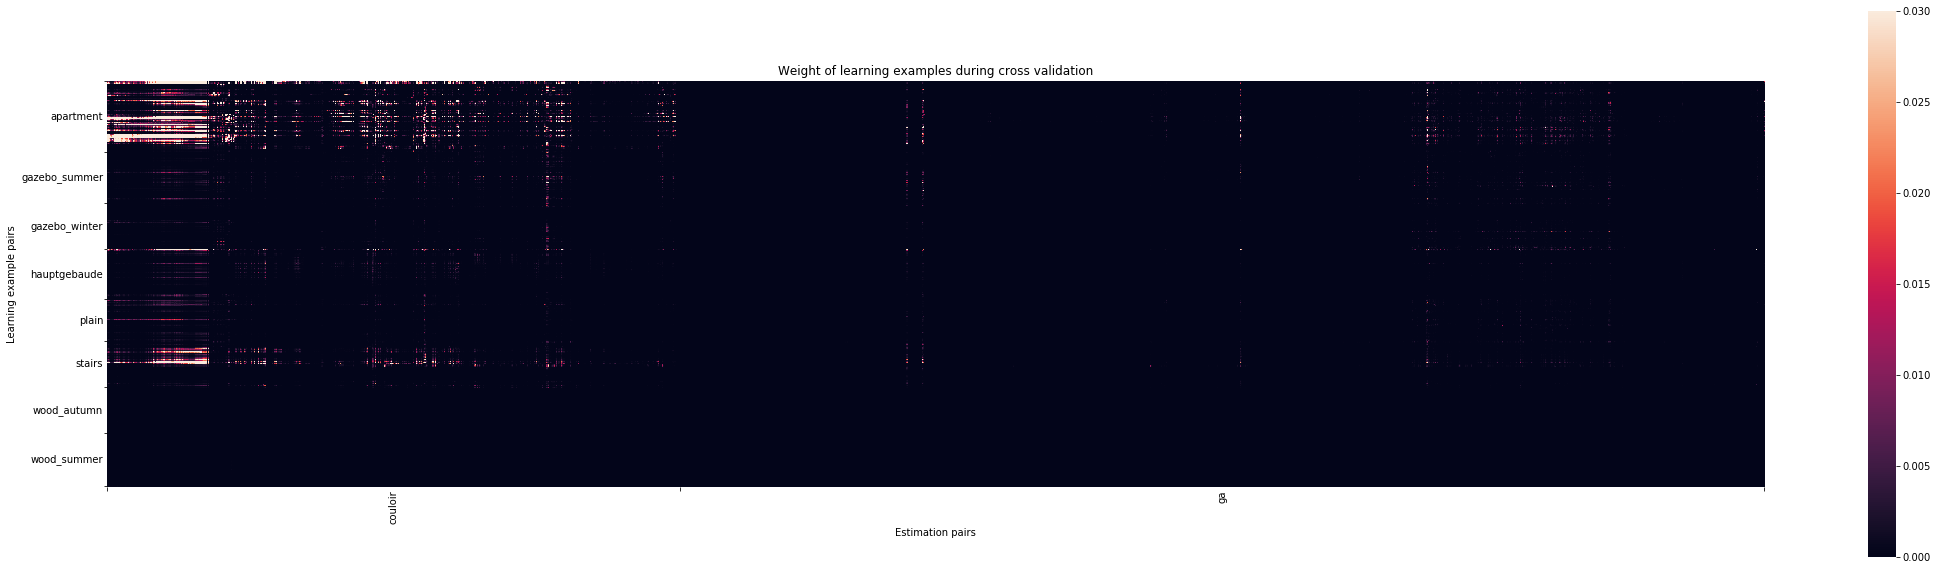

In [157]:
fig, ax1 = plt.subplots()
sb.heatmap(similarity_matrix, ax=ax1, square=True, cbar_kws={"shrink": .82}, vmin=0.0, vmax=0.03)
ax1.tick_params(axis='both', which='minor', length=0)



ax1.set_xticks(query_major_ticks)
ax1.set_xticklabels('')
ax1.set_xticks(query_minor_ticks, minor=True)
ax1.set_xticklabels(query_labels, horizontalalignment='center', minor=True, rotation=90)


ax1.set_yticks(major_ticks)
ax1.set_yticklabels('')
ax1.set_yticks(minor_ticks, minor=True)
ax1.set_yticklabels(labels, verticalalignment='center', minor=True)

ax1.set_xlabel('Estimation pairs')
ax1.set_ylabel('Learning example pairs')
ax1.set_title('Weight of learning examples during cross validation')

plt.tight_layout()
fig.set_size_inches((40.0,10.0))
plt.savefig('/home/dlandry/fig.png')
plt.show()

# Evolution of trace

In [24]:
ys_predicted = model.predict(xs_query)

<IPython.core.display.Javascript object>


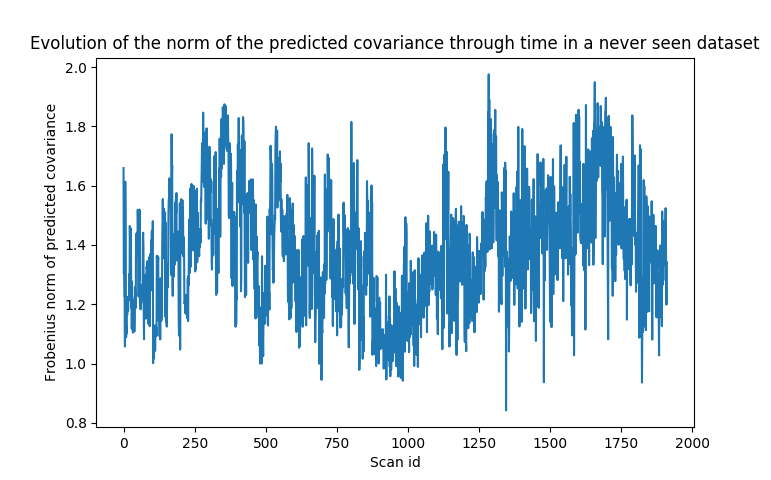

In [28]:
fig, ax = plt.subplots()
traces = np.zeros(len(ys_predicted))
for i in range(len(ys_predicted)):
    traces[i] = np.linalg.norm(ys_predicted[i])
    
ax.plot(traces)
ax.set_title('Evolution of the norm of the predicted covariance through time in a never seen dataset')
ax.set_xlabel('Scan id')
ax.set_ylabel('Frobenius norm of predicted covariance')

In [37]:
traces.shape

(1911,)

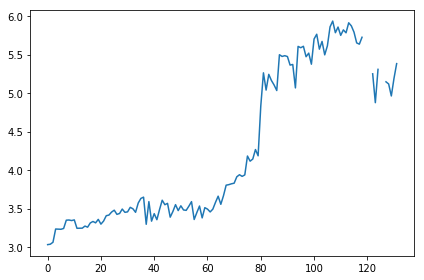

In [38]:
plt.tight_layout()
plt.show()

# Regular everyday matrix

In [ ]:


with open('/home/dlandry/ssdataset/learning_runs/2018-05-23-normals-444-nohaupt-val-gazebo-winter.json') as f:
    learning_run = json.load(f)
model = model_loader(learning_run)

In [ ]:
dataset_xs = np.array(dataset['data']['xs'])

xs = dataset_xs[learning_run['validation_set']]

In [ ]:
weights = np.empty((len(xs), len(model.model_predictors)))

for i, descriptor in enumerate(xs):
    dists = model.compute_distances(descriptor)
    weights[i] = model.distances_to_weights(torch.Tensor(dists))

In [ ]:
# Reorder by dataset
list_of_locations = np.array([x['dataset'] for x in dataset['data']['pairs']])

In [ ]:
list_of_locations[learning_run['train_set']]

In [ ]:
def add_dataset_boundaries(location_list, ax):
    preceding_location = ''
    for i, location in enumerate(location_list):
        if location != preceding_location:
            ax.hlines(y=i, xmin=0, xmax=100)
            plt.text(5, i + 25, location)
        preceding_location = location

In [ ]:
fig, ax = plt.subplots()

im = ax.imshow(weights.T)
cbar = plt.colorbar(im)
cbar.ax.set_ylabel('Weight')
plt.xlabel('Example ID (training set)')
plt.ylabel('Example ID (validation set)')
plt.title('Weight of the training examples during \n the validation of apartment')

test_locations = list_of_locations[learning_run['train_set']]
add_dataset_boundaries(test_locations, ax)


plt.show()

In [ ]:
# Find the boundaries in datasets


In [ ]:
learning_run['train_set']